# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [1]:
# import all necessary packages 

import pandas as pd
import re

import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

# download the data

In [2]:
# read in data into dataframe

beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'
breweries_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/brewery_cleaned.csv'

beer_df = pd.read_csv(beer_url)
breweries_df = pd.read_csv(breweries_url)
beer_df.head(4)



,abv,ibu,beer_id,beer_name,style,style_group,ounces,brewery_id
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),American Pale Ale (APA),12.0,177
1,0.099,92.0,1036,Lower De Boom,American Barleywine,other,8.4,368
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,other,12.0,368
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),American Pale Ale (APA),12.0,368


In [20]:
# split the data into abv, ibu, beer_name, and style, and style group
abv = beer_df.to_numpy()[:,0]
ibu = beer_df.to_numpy()[:,1]
beer_name = beer_df.to_numpy()[:,3]
style = beer_df.to_numpy()[:,4]
style_group = beer_df.to_numpy()[:,5]
print('abv:', abv)
print('style:', style)

abv_flt = beer_df['abv'].astype(float)
ibu_flt = beer_df['ibu'].astype(float)

abv_ibu = np.empty([abv_flt.shape[0], 2])

for i in range(abv_flt.shape[0]):
    abv_ibu[i,0] = abv_flt[i]
    abv_ibu[i,1] = ibu_flt[i]

# abv_flt_reshaped
# abv_ibu_minmax = MinMaxScaler().fit_transform(abv_ibu)

# abv_fit_minmax = MinMaxScaler().fit_transform(abv_flt)
# ibu_flt_minmax = MinMaxScaler().fit_transform(ibu_flt)

print('abv_flt:', abv_flt)
print('ibu_flt:', ibu_flt)
print('abv_flt_shape', abv_flt.shape)

# print('ibu[0]', ibu[0])

print('abv_ibu', abv_ibu.shape)
# print('abv_ibu[0,1]', abv_ibu[0,1])
# print(abv_ibu_minmax)


abv: [0.061 0.099 0.079 ... 0.06 0.067 0.055]
style: ['American Pale Ale (APA)' 'American Barleywine' 'Winter Warmer' ...
 'American Pale Ale (APA)' 'Belgian IPA' 'American Pale Ale (APA)']
abv_flt: 0       0.061
1       0.099
2       0.079
3       0.044
4       0.049
        ...  
1321    0.077
1322    0.069
1323    0.060
1324    0.067
1325    0.055
Name: abv, Length: 1326, dtype: float64
ibu_flt: 0       60.0
1       92.0
2       45.0
3       42.0
4       17.0
        ... 
1321    30.0
1322    69.0
1323    50.0
1324    45.0
1325    40.0
Name: ibu, Length: 1326, dtype: float64
abv_flt_shape (1326,)
abv_ibu (1326, 2)


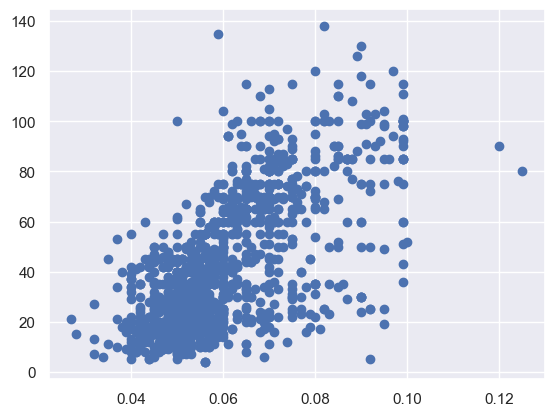

In [21]:
plt.scatter(abv_flt, ibu_flt)

In [ ]:
# plt.scatter(abv_flt_minmax, ibu_flt_minmax)

In [28]:
# split the data into training and testing sets

#abv_train, abv_test, ibu_train, ibu_test, beer_name_train, beer_name_test, style_train, style_test = train_test_split(abv, ibu, beer_name, style, test_size = 0.2)

abv_ibu_train, abv_ibu_test = train_test_split(abv_ibu, test_size=0.3)

abv_ibu_xtrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 0].reshape(-1, 1))
abv_ibu_ytrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 1].reshape(-1, 1))

print(abv_ibu[:, 0])
print(abv_ibu_xtrain_minmax)


[0.061 0.099 0.079 ... 0.06  0.067 0.055]
[[0.48979592]
 [0.23469388]
 [0.28571429]
 [0.44897959]
 [0.26530612]
 [0.25510204]
 [0.35714286]
 [0.23469388]
 [0.10204082]
 [0.16326531]
 [0.41836735]
 [0.69387755]
 [0.23469388]
 [0.23469388]
 [0.42857143]
 [0.28571429]
 [0.54081633]
 [0.73469388]
 [0.59183673]
 [0.32653061]
 [0.26530612]
 [0.13265306]
 [0.25510204]
 [0.40816327]
 [0.21428571]
 [0.36734694]
 [0.21428571]
 [0.25510204]
 [0.15306122]
 [0.29591837]
 [0.23469388]
 [0.3877551 ]
 [0.43877551]
 [0.39795918]
 [0.18367347]
 [0.2244898 ]
 [0.3877551 ]
 [0.28571429]
 [0.66326531]
 [0.18367347]
 [0.23469388]
 [0.33673469]
 [0.52040816]
 [0.31632653]
 [0.52040816]
 [0.24489796]
 [0.31632653]
 [0.42857143]
 [0.24489796]
 [0.35714286]
 [0.30612245]
 [0.25510204]
 [0.2244898 ]
 [0.2755102 ]
 [0.28571429]
 [0.42857143]
 [0.19387755]
 [0.32653061]
 [0.69387755]
 [0.24489796]
 [0.23469388]
 [0.34693878]
 [0.28571429]
 [0.73469388]
 [0.54081633]
 [0.25510204]
 [0.44897959]
 [0.23469388]
 [0.54

In [29]:
num_train_data = abv_ibu_train.shape[0]
print('Number of training data points:', num_train_data)

num_test_data = abv_ibu_test.shape[0]
print('Number of testing data point:', num_test_data)


Number of training data points: 928
Number of testing data point: 398


c:\Users\marcu\.conda\envs\EE595-Lab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 9 5 1 2 4 0 1 5 2 0 3 9 4 0 4 6 8 6 9 1 5 2 0 2 5 5 4 9 9 9 6 6 0 4 5 8
 9 1 4 2 5 0 2 0 1 8 1 9 0 1 2 5 2 1 5 4 2 1 4 5 9 5 2 0 1 6 4 0 4 4 9 1 8
 3 8 0 4 6 4 6 1 5 6 2 4 9 0 1 4 1 4 4 9 7 9 2 1 0 2 7 2 1 0 1 3 6 5 1 8 0
 9 0 0 9 1 4 1 5 5 2 5 9 1 1 2 5 0 4 8 6 4 5 0 4 0 6 0 5 5 9 5 5 1 6 6 4 3
 0 4 4 9 0 3 0 1 4 9 5 4 8 5 1 5 2 0 4 1 0 1 8 1 8 4 1 0 9 9 5 3 3 8 0 0 2
 5 1 9 1 8 9 2 0 4 1 9 5 9 4 3 1 4 3 4 0 2 5 1 0 2 2 6 4 4 1 5 4 4 0 6 4 0
 3 1 4 2 1 1 2 8 1 4 2 1 1 2 3 9 2 1 8 5 4 1 5 4 9 5 5 2 5 0 8 2 4 0 2 4 5
 3 8 5 9 1 5 0 4 0 3 9 4 1 2 5 0 2 0 5 8 4 1 4 1 1 0 2 6 6 0 2 5 4 9 2 0 8
 6 9 5 0 2 1 1 1 0 0 4 1 8 0 4 6 0 2 2 8 8 0 8 1 1 2 4 5 8 5 1 4 4 2 4 2 2
 9 6 6 6 6 5 4 0 0 8 1 9 3 9 4 1 5 4 2 1 1 4 0 4 2 0 1 2 0 7 0 8 1 0 2 0 4
 8 6 4 4 8 9 9 1 4 8 0 5 1 0 0 1 1 9 1 9 3 1 8 4 0 9 6 4 5 8 6 1 2 8 5 5 4
 3 5 1 4 1 7 2 9 3 2 1 4 1 1 4 8 2 4 6 4 2 9 3 4 8 3 2 2 1 9 4 5 2 5 4 6 4
 4 4 4 8 8 8 2 4 2 2 4 1 5 3 8 9 2 0 9 4 1 0 0 4 6 6 4 7 9 5 9 7 2 5 4 2 6
 2 0 5 1 4 9 9 9 5 5 0 5 

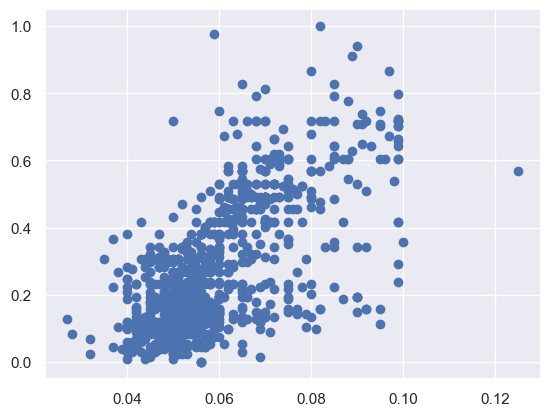

In [30]:
num_centers = 10

from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=num_centers)
kmeans.fit(abv_ibu_train)

y_kmeans = kmeans.predict(abv_ibu_train)
y_kmeans

# plt.scatter(abv_ibu_train[:,0], abv_ibu_train[:,1])
plt.scatter(abv_ibu_train[:, 0], abv_ibu_ytrain_minmax)

print(y_kmeans)

# look at different dataset with "srm"

In [3]:
# different beer cvs file

#beers_url = "https://raw.githubusercontent.com/aureliusbd/tinybEEr/main/beers.csv"

#beer_opendata_df = pd.read_csv(beers_url)
#beer_opendata_df.head(3)



/var/folders/bw/mcsyxzmn1hb9278cn9k93vch0000gn/T/ipykernel_42426/1325035753.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,46,48,49,50,51,52,54,58,60,61,62,63,64,66,70,71,72,73,74,75,76,78,82,84,85,86,87,88,90,94,96,97,98,99,100,102,108,109,110,111,112,114,118,119,121,122,123,124,126,131,133,134,135,136,138,143,145,146,147,148,150,155,157,158,159,160,162,167,169,170,171,172,174,179,181,182,183,184,186,191,193,194,195,196,198,203,205,206,207,215,217,219,227,229,231,239,240,241,242,243,245,247,251,253,255,257,263,264,266,268,276,278,280,288,290,292,300,302,304,312,314,316,324,326,328,336,338,340,348,349,350,351,353,355,363,364,366,368,376,378,380,388,390,392,400,402,404,412,414,416,424,426,428,436,438,440,448,450,452,460,462,464,474,476,484,486,488,496,498,500,508,510,512,520,522,524,532,534,536,544) have mixed types. Specify dtype option on import or set low_memory=False.
  beer_opendata_df = pd.read_csv(beers_url)


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,...,Unnamed: 535,Unnamed: 536,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543,Unnamed: 544
0,1,812,Hocus Pocus,11,116,4.5,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#srm = beer_opendata_df.to_numpy()[:,7]
#abv_beers = beer_opendata_df.to_numpy()[:,5]
#print('srm shape orig:', srm.shape)

#def convert_to_float(value):
    #try:
        #return float(value)
    #except ValueError:
        #return np.nan
    
#srm_flt = np.vectorize(convert_to_float)(srm)
#abv_beers_flt = np.vectorize(convert_to_float)(abv_beers)

#print('srm new shape:', srm_flt.shape)

#print('srm_flt:', srm_flt)


#def convert_to_float_2(value):
    #try:
        #cleaned_value = re.sub(r'[^\d.]+', '', value)  # Remove non-numeric characters
        #return float(cleaned_value)
    #except ValueError:
        #return np.nan


#print('abv:', abv_beers_flt)

srm shape orig: (5861,)
srm new shape: (5861,)
srm_flt: [0. 0. 0. ... 0. 0. 0.]
abv: [4.5 6.7 9.1 ... 0.  0.  0. ]


Text(0, 0.5, 'abv_beers')

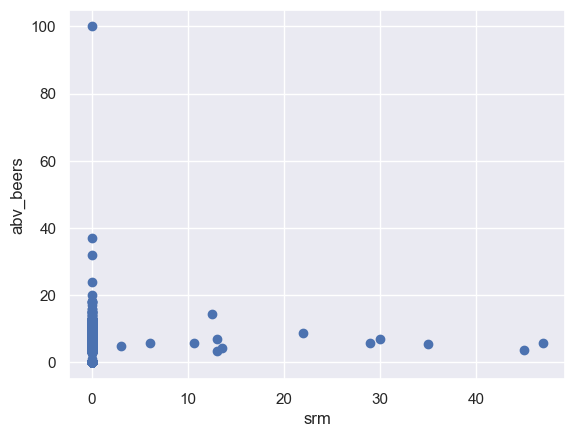

In [42]:
#plt.scatter(srm_flt, abv_beers_flt)
#plt.xlabel('srm')
#plt.ylabel('abv_beers')

In [45]:
# determine how many values are not zero
#nonzero_val = np.count_nonzero(srm_flt > 0)
#zero_val = np.count_nonzero(srm_flt == 0)
#print('Number of nonzero SRM values in dataset:', nonzero_val)
#print('Number of zeros in dataset:', zero_val)

Number of nonzero SRM values in dataset: 13
Number of zeros in dataset: 5808
